In [1]:
import pandas as pd

In [2]:
dados = pd.read_excel('/content/ilhabela_combined.xlsx')

In [3]:
dados.head()

,Praia,Mês,Dia 1,Dia 2,Dia 3,Dia 4,Dia 5,Dia 6,Dia 7,Dia 8,...,Dia 23,Dia 24,Dia 25,Dia 26,Dia 27,Dia 28,Dia 29,Dia 30,Dia 31,Ano
0,Armção,Janeiro,Impróprio,Próprio,Próprio,Não Medido,Próprio,Impróprio,Impróprio,Impróprio,...,Impróprio,Não Medido,Impróprio,Próprio,Próprio,Próprio,Impróprio,Não Medido,Impróprio,2018
1,Armção,Fevereiro,Próprio,Próprio,Próprio,Impróprio,Próprio,Impróprio,Impróprio,Próprio,...,Não Medido,Não Medido,Impróprio,Impróprio,Próprio,Próprio,NaN,NaN,NaN,2018
2,Armção,Março,Impróprio,Impróprio,Próprio,Impróprio,Impróprio,Próprio,Não Medido,Impróprio,...,Próprio,Impróprio,Próprio,Próprio,Próprio,Próprio,Próprio,Próprio,Próprio,2018
3,Armção,Abril,Impróprio,Não Medido,Próprio,Próprio,Próprio,Próprio,Não Medido,Próprio,...,Próprio,Próprio,Impróprio,Impróprio,Próprio,Próprio,Próprio,Próprio,NaN,2018
4,Armção,Maio,Próprio,Próprio,Próprio,Impróprio,Próprio,Impróprio,Impróprio,Próprio,...,Próprio,Impróprio,Impróprio,Impróprio,Próprio,Impróprio,Impróprio,Próprio,Impróprio,2018


In [4]:
dados['Mês'].value_counts()

Mês
Janeiro      57
Fevereiro    57
Março        57
Abril        57
Maio         57
Junho        57
Julho        57
Agosto       57
Setembro     57
Outubro      57
Novembro     57
Dezembro     57
Name: count, dtype: int64

In [5]:
dados['Praia'].value_counts(normalize = True) * 100
frequencia = dados['Praia'].value_counts()
percentual = dados['Praia'].value_counts(normalize = True) * 100
percentual

Praia
Armção             7.017544
Pinto              7.017544
Perequê            5.263158
Veloso             5.263158
Curral             5.263158
Grande             5.263158
Juliao             5.263158
Feiticeira         5.263158
Portinho           5.263158
Ilha das Cabras    5.263158
Itaguaçu           5.263158
Itaquanduba        5.263158
Engenho D'água     5.263158
Saco da Capela     5.263158
Barreiros Sul      5.263158
Barreiros Norte    5.263158
Viana              5.263158
Sino               5.263158
Siriuba            1.754386
Name: proportion, dtype: float64

In [6]:

# Função para calcular a frequência de uma condição específica
def calculate_frequency(df, condition):
    # Usando regex para selecionar apenas as colunas dos dias
    condition_columns = df.filter(regex='Dia')
    return (condition_columns == condition).sum().sum()  # Soma as condições verdadeiras em todas as colunas

# Calculando a frequência para 'Impróprio'
improprio_frequency = calculate_frequency(dados, 'Impróprio')

# Calculando a frequência para 'Não Medido'
nao_medido_frequency = calculate_frequency(dados, 'Próprio')

# Exibindo os resultados
print(f"Frequência de 'Impróprio': {improprio_frequency}")
print(f"Frequência de 'Próprio': {nao_medido_frequency}")


Frequência de 'Impróprio': 8177
Frequência de 'Próprio': 10525


In [10]:
import pandas as pd


# Transformar os dados: converter o DataFrame de formato wide para long
melted_data = dados.melt(id_vars=['Praia', 'Mês', 'Ano'], var_name='Dia', value_name='Condição')

# Filtrar apenas as condições 'Impróprio'
improprio_data = melted_data[melted_data['Condição'] == 'Impróprio']

# Contar quantos dias 'Impróprio' cada mês de cada ano tem
improprio_count = improprio_data.groupby(['Ano', 'Mês']).size().reset_index(name='Dias Impróprios')

# Pivotar os dados para ter os anos nas colunas e os meses nas linhas
pivot_table = improprio_count.pivot(index='Mês', columns='Ano', values='Dias Impróprios')

# Preencher valores NaN com zero para meses sem registro
pivot_table.fillna(0, inplace=True)

# Ordenar os meses corretamente
months_order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
pivot_table = pivot_table.reindex(months_order)

import pandas as pd

# Carregar os dados
file_path = '/mnt/data/ilhabela_combined.xlsx'
dados = pd.read_excel(file_path)

# Transformar os dados: converter o DataFrame de formato wide para long
melted_data = dados.melt(id_vars=['Praia', 'Mês', 'Ano'], var_name='Dia', value_name='Condição')

# Filtrar apenas as condições 'Impróprio'
improprio_data = melted_data[melted_data['Condição'] == 'Impróprio']

# Contar quantos dias 'Impróprio' cada mês de cada ano tem
improprio_count = improprio_data.groupby(['Ano', 'Mês']).size().reset_index(name='Dias Impróprios')

# Pivotar os dados para ter os anos nas colunas e os meses nas linhas
pivot_table = improprio_count.pivot(index='Mês', columns='Ano', values='Dias Impróprios')

# Preencher valores NaN com zero para meses sem registro
pivot_table.fillna(0, inplace=True)

# Ordenar os meses corretamente
months_order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
pivot_table = pivot_table.reindex(months_order)

pivot_table


Ano,2018,2021,2022,2023
Mês,,,,
Janeiro,199,40,225,219
Fevereiro,203,21,181,207
Março,229,29,235,208
Abril,210,37,232,216
Maio,216,40,244,220
Junho,198,38,200,193
Julho,216,35,205,241
Agosto,214,33,223,229
Setembro,201,35,188,206


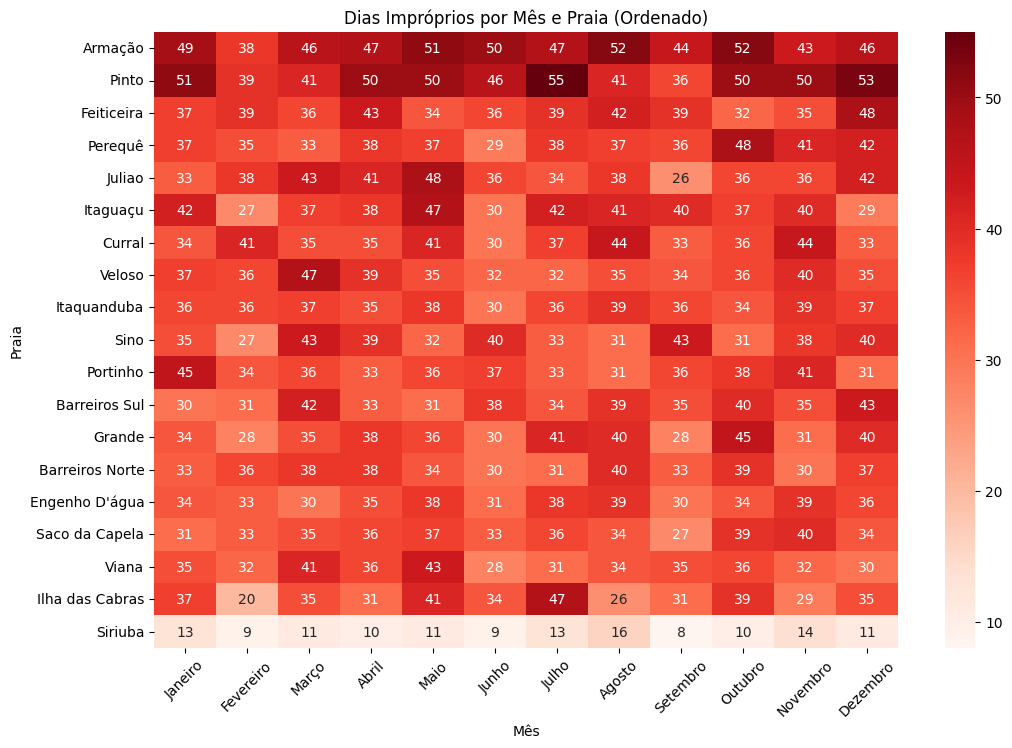

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar seu DataFrame
# dados = pd.read_csv('caminho_para_seu_arquivo.csv')  # Se estiver usando um arquivo

# Corrigir o nome da praia no DataFrame
dados['Praia'] = dados['Praia'].replace('Armção', 'Armação')

# Definir a ordem cronológica dos meses
month_order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Função para contar dias impróprios por mês
def count_improper_days(row):
    return len([day for day in row[2:] if day == 'Impróprio'])  # Ajustar índice se necessário

# Aplicar a função em cada linha
dados['Dias Impróprios'] = dados.apply(count_improper_days, axis=1)

# Criar uma tabela pivot para sumarizar os dados por mês e praia, garantindo a ordem dos meses
pivot_table = pd.pivot_table(dados, values='Dias Impróprios', index='Praia', columns='Mês', aggfunc='sum', fill_value=0)
pivot_table = pivot_table.reindex(columns=month_order)  # Ordenar os meses

# Ordenar as praias com base no total de dias impróprios
pivot_table['Total'] = pivot_table.sum(axis=1)  # Adiciona uma coluna total temporária
pivot_table = pivot_table.sort_values(by='Total', ascending=False)  # Ordena praias
pivot_table.drop(columns='Total', inplace=True)  # Remove a coluna total

# Criar a tabela de calor
plt.figure(figsize=(12, 8))  # Ajuste o tamanho conforme necessário
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt='g')
plt.title('Dias Impróprios por Mês e Praia (Ordenado)')
plt.ylabel('Praia')
plt.xlabel('Mês')
plt.xticks(rotation=45)  # Rotação dos nomes dos meses para melhor visualização
plt.show()


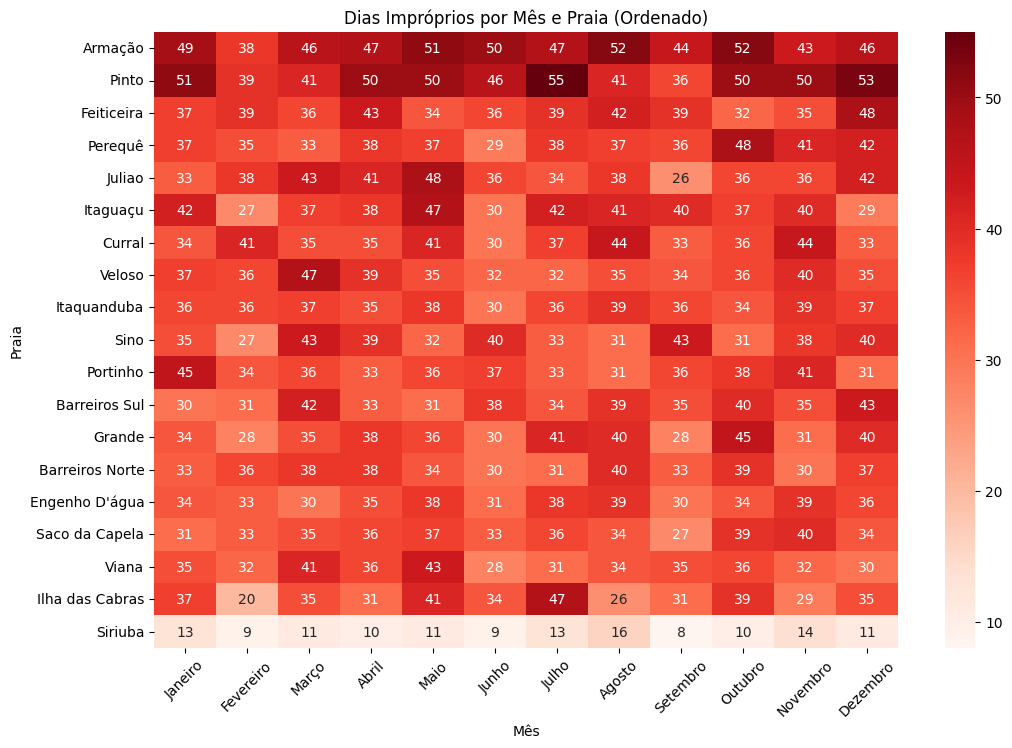

In [30]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar seu DataFrame
# dados = pd.read_csv('caminho_para_seu_arquivo.csv')  # Se estiver usando um arquivo

# Corrigir o nome da praia no DataFrame
dados['Praia'] = dados['Praia'].replace('Armção', 'Armação')

# Definir a ordem cronológica dos meses
month_order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Função para contar dias impróprios por mês
def count_improper_days(row):
    return len([day for day in row[2:] if day == 'Impróprio'])  # Ajustar índice se necessário

# Aplicar a função em cada linha
dados['Dias Impróprios'] = dados.apply(count_improper_days, axis=1)

# Criar uma tabela pivot para sumarizar os dados por mês e praia, garantindo a ordem dos meses
pivot_table = pd.pivot_table(dados, values='Dias Impróprios', index='Praia', columns='Mês', aggfunc='sum', fill_value=0)
pivot_table = pivot_table.reindex(columns=month_order)  # Ordenar os meses

# Ordenar as praias com base no total de dias impróprios
pivot_table['Total'] = pivot_table.sum(axis=1)  # Adiciona uma coluna total temporária
pivot_table = pivot_table.sort_values(by='Total', ascending=False)  # Ordena praias
pivot_table.drop(columns='Total', inplace=True)  # Remove a coluna total

# Criar a tabela de calor
plt.figure(figsize=(12, 8))  # Ajuste o tamanho conforme necessário
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt='g')
plt.title('Dias Impróprios por Mês e Praia (Ordenado)')
plt.ylabel('Praia')
plt.xlabel('Mês')
plt.xticks(rotation=45)  # Rotação dos nomes dos meses para melhor visualização
plt.show()

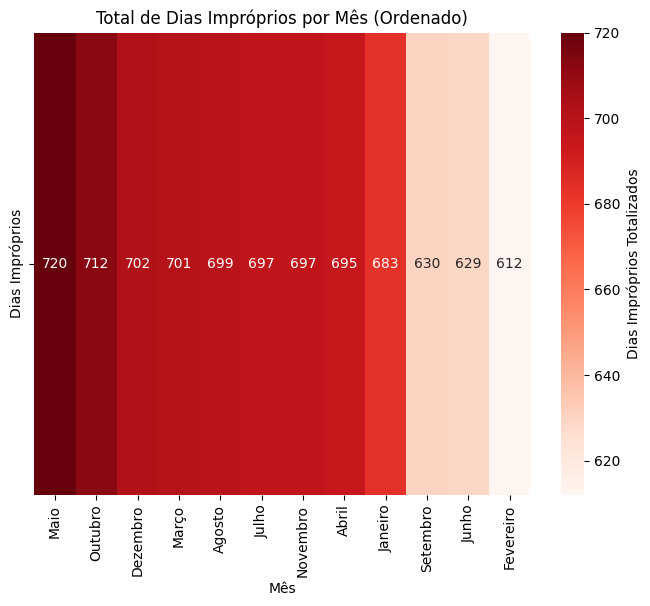

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponho que 'dados' seja seu DataFrame já carregado e preparado

# Função para contar dias impróprios por mês
def count_improper_days(row):
    return len([day for day in row[2:] if day == 'Impróprio'])  # Ajustar índice se necessário

# Aplicar a função em cada linha
dados['Dias Impróprios'] = dados.apply(count_improper_days, axis=1)

# Criar uma tabela pivot para sumarizar os dados por mês, somando todos os dias impróprios de todas as praias
pivot_table = pd.pivot_table(dados, values='Dias Impróprios', index='Mês', aggfunc='sum', fill_value=0)

# Ordenar os meses do pior para o melhor
pivot_table = pivot_table.sort_values(by='Dias Impróprios', ascending=False)

# Criar a tabela de calor
plt.figure(figsize=(8, 6))  # Ajuste o tamanho conforme necessário
sns.heatmap(pivot_table.T, annot=True, cmap='Reds', fmt='g', cbar_kws={'label': 'Dias Impróprios Totalizados'})
plt.title('Total de Dias Impróprios por Mês (Ordenado)')
plt.ylabel('')
plt.xlabel('Mês')
plt.show()


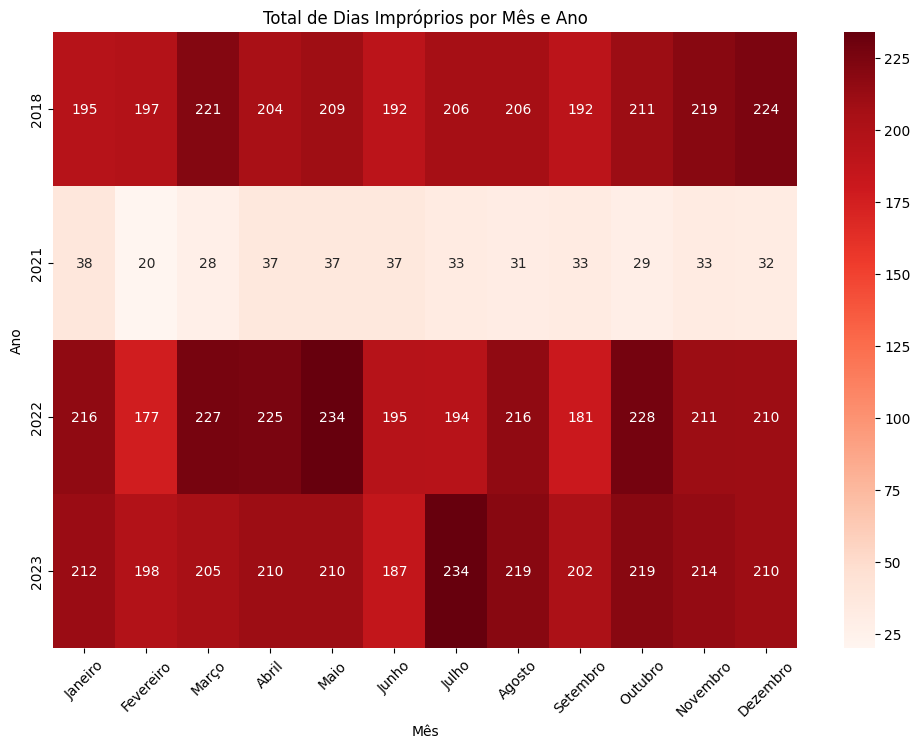

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar seu DataFrame
# dados = pd.read_csv('caminho_para_seu_arquivo.csv')  # Se estiver usando um arquivo

# Definir a ordem cronológica dos meses
month_order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Suponho que você tenha uma coluna 'Ano' já no DataFrame, se não, você deverá adicioná-la.

# Função para contar dias impróprios por mês
def count_improper_days(row):
    return len([day for day in row[3:] if day == 'Impróprio'])  # Ajustar índice se necessário, considerando a coluna 'Ano'

# Aplicar a função em cada linha
dados['Dias Impróprios'] = dados.apply(count_improper_days, axis=1)

# Criar uma tabela pivot para sumarizar os dados por mês e ano, garantindo a ordem dos meses
pivot_table = pd.pivot_table(dados, values='Dias Impróprios', index='Ano', columns='Mês', aggfunc='sum', fill_value=0)
pivot_table = pivot_table.reindex(columns=month_order)  # Reordenando as colunas de acordo com a ordem dos meses

# Criar a tabela de calor
plt.figure(figsize=(12, 8))  # Ajuste o tamanho conforme necessário
sns.heatmap(pivot_table, annot=True, cmap='Reds', fmt='g')
plt.title('Total de Dias Impróprios por Mês e Ano')
plt.ylabel('Ano')
plt.xlabel('Mês')
plt.xticks(rotation=45)  # Rotação dos nomes dos meses para melhor visualização
plt.show()
